# *INTRODUCTION*

**Machine Learning Path:**</br>
BERLIAN MUHAMMAD GALIN AL AWIENOOR (M360DKX4331)</br>
FAKHRUL MAULIDAN GUSTIANA (M360DKX4329) 

# ***Link Dataset & Repository***:

https://github.com/berlianm/Rubist-Application

# *Convolutional Neural Network* (CNN)

CNN (*Convolutional Neural Network*) adalah jenis arsitektur jaringan saraf tiruan (*neural network*) yang dikhususkan untuk pengolahan data visual, seperti gambar. CNN terinspirasi oleh struktur visual korteks pada otak manusia dan dirancang untuk secara efektif mengekstraksi fitur dari gambar.



---


CNN terdiri dari beberapa lapisan yang berbeda, termasuk lapisan konvolusi (*convolutional layer*), lapisan *pooling*, dan lapisan *fully connected*.  

* Lapisan konvolusi bertanggung jawab untuk mengekstraksi fitur-fitur penting dari gambar dengan menerapkan operasi konvolusi pada input.
* Lapisan *pooling* digunakan untuk mengurangi dimensi spasial dari fitur yang diekstraksi, sehingga mengurangi kompleksitas perhitungan. 
* Lapisan *fully connected* adalah lapisan terakhir dari CNN yang menghubungkan fitur-fitur yang diekstraksi ke dalam neuron-neuron untuk klasifikasi.


---



CNN memiliki kemampuan untuk secara otomatis mempelajari fitur-fitur yang penting dari gambar melalui proses pelatihan. Proses ini melibatkan memberikan contoh-contoh gambar yang sudah dilabeli pada model CNN, dan model akan menyesuaikan bobot-bobotnya untuk mengenali pola dan fitur-fitur yang berkaitan dengan kelas-kelas yang ada.

CNN telah menjadi salah satu teknik yang paling sukses dalam bidang pengolahan gambar dan memiliki banyak aplikasi dalam pengenalan objek, klasifikasi gambar, deteksi wajah, dan lainnya.

# *ARCHITECTURE* CNN

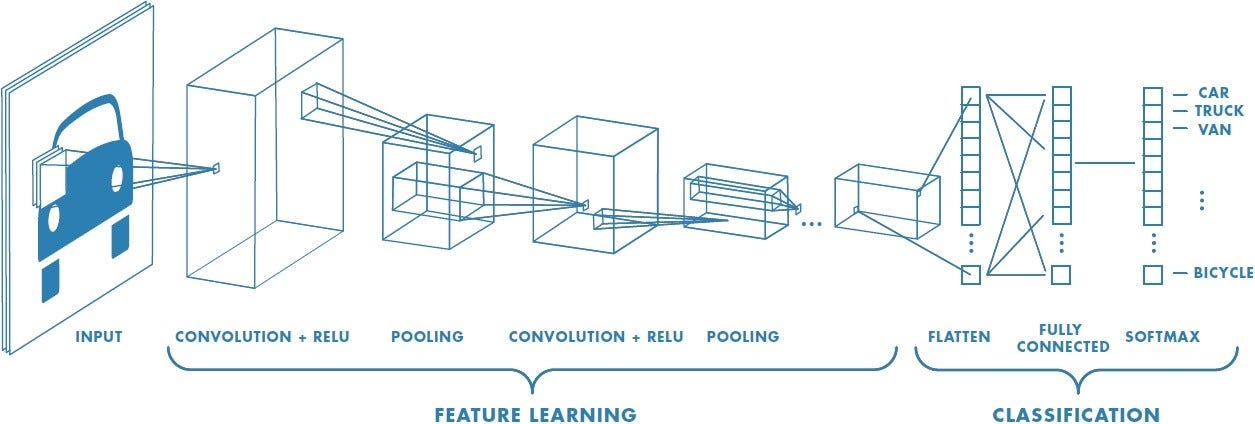

# *PROBLEM STATEMENT*

*Rubbish Sorting Assistant (Rubist) is a mobile application designed to address the problem of improper rubbish management in Indonesia. With a lack of awareness of proper rubbish management, many people contribute to the growing rubbish problem. Through the use of machine learning algorithms, Rubbish Sorting Assistant (Rubist) aims to provide a solution by assisting users in identifying the type of rubbish and providing instructions on how to properly dispose or recycle it. The goal of the project is to promote better rubbish management solutions and create a cleaner and healthier environment. By helping people manage rubbish properly, we hope to reduce the rubbish problem in Indonesia and contribute to a cleaner and healthier future.*

---

*Rubbish Sorting Assistant *(Rubist) adalah aplikasi seluler yang dirancang untuk mengatasi masalah pengelolaan sampah yang tidak tepat di Indonesia. Dengan kurangnya kesadaran akan pengelolaan sampah yang benar, banyak orang berkontribusi terhadap masalah sampah yang semakin meningkat. Melalui penggunaan algoritma pembelajaran mesin, Rubbish Sorting Assistant (Rubist) bertujuan untuk memberikan solusi dengan membantu pengguna dalam mengidentifikasi jenis sampah dan memberikan petunjuk tentang cara membuang atau mendaur ulang dengan benar. Tujuan dari proyek ini adalah untuk mempromosikan solusi pengelolaan sampah yang lebih baik dan menciptakan lingkungan yang lebih bersih dan sehat. Dengan membantu masyarakat mengelola sampah dengan baik, kami berharap dapat mengurangi masalah sampah di Indonesia dan berkontribusi untuk masa depan yang lebih bersih dan sehat.

# *IMPORTING*

Memasukkan modul dan *library* ke dalam program agar dapat menggunakan fungsi, kelas, atau variabel yang telah didefinisikan di dalamnya.

In [ ]:
# operating system
import os

# importing dataset
import zipfile

# numeric operation 
import numpy as np
import math

# data manipulation
import pandas as pd

# data visualization
import matplotlib.pyplot as plt
import seaborn as sns

# image manipulation
from PIL import Image
from keras.preprocessing.image import ImageDataGenerator #, img_to_array, load_img

# data splitting
from sklearn.model_selection import train_test_split

# transforming data to binary
from keras.utils import to_categorical

# data sequential
from keras.models import Sequential

# layer (lapisan) on neural network
from keras.layers import Conv2D, MaxPooling2D, Activation, Flatten, Dense, Dropout, BatchNormalization

# model VGG16 (Visual Geometry Group)
# used for the purposes of image classification, transfer learning, and feature extraction
from keras.applications import VGG16

# data preprocessing
from sklearn import preprocessing

# data slope (kemiringan)
from scipy.stats import skew

# lost value
from sklearn.impute import SimpleImputer 

# other
from keras.utils.vis_utils import plot_model
from glob import glob

# optimizer
from tensorflow.keras.optimizers import Adam

# importing class and function
from sklearn.model_selection import train_test_split
from __future__ import print_function
import sys,tempfile, urllib, os

# *DATASET*

Memuat *dataset* ke dalam program untuk digunakan dalam pemodelan.

In [ ]:
# reading dataset from github
!wget --no-check-certificate \
    "https://github.com/berlianm/Rubist-Application/archive/refs/heads/main.zip" \
    -O "/tmp/dataset.zip"


zip_ref = zipfile.ZipFile('/tmp/dataset.zip', 'r') #open zip file in read mode
zip_ref.extractall('/tmp') #extract files into the /tmp folder
zip_ref.close()

--2023-06-04 05:34:55--  https://github.com/berlianm/Rubist-Application/archive/refs/heads/main.zip
Resolving github.com (github.com)... 20.27.177.113
Connecting to github.com (github.com)|20.27.177.113|:443... connected.
HTTP request sent, awaiting response... 302 Found
Location: https://codeload.github.com/berlianm/Rubist-Application/zip/refs/heads/main [following]
--2023-06-04 05:34:55--  https://codeload.github.com/berlianm/Rubist-Application/zip/refs/heads/main
Resolving codeload.github.com (codeload.github.com)... 20.27.177.114
Connecting to codeload.github.com (codeload.github.com)|20.27.177.114|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: unspecified [application/zip]
Saving to: ‘/tmp/dataset.zip’

/tmp/dataset.zip        [                <=> ]  78.78M  25.8MB/s    in 3.2s    

2023-06-04 05:34:59 (24.3 MB/s) - ‘/tmp/dataset.zip’ saved [82606929]



In [ ]:
# exploring dataset
cardboard_path = '/tmp/Rubist-Application-main/dataset/cardboard'
glass_path = '/tmp/Rubist-Application-main/dataset/glass'
metal_path = '/tmp/Rubist-Application-main/dataset/metal'
paper_path = '/tmp/Rubist-Application-main/dataset/paper'
plastic_path = '/tmp/Rubist-Application-main/dataset/plastic'
trash_path = '/tmp/Rubist-Application-main/dataset/trash'

num_cardboard = len(os.listdir(cardboard_path))
num_glass = len(os.listdir(glass_path))
num_metal = len(os.listdir(metal_path))
num_paper = len(os.listdir(paper_path))
num_plastic = len(os.listdir(plastic_path))
num_trash = len(os.listdir(trash_path))

print('Data Cardboard:', num_cardboard)
print('Data Glass    :', num_glass)
print('Data Metal    :', num_metal)
print('Data Paper    :', num_paper)
print('Data Plastic  :', num_plastic)
print('Data Trash    :', num_trash)

Data Cardboard: 403
Data Glass    : 501
Data Metal    : 410
Data Paper    : 594
Data Plastic  : 482
Data Trash    : 347


In [ ]:
# total number of dataset
total_data = num_cardboard + num_glass + num_metal + num_paper + num_plastic + num_trash

print('Total Data:', total_data)

Total Data: 2737


In [ ]:
# dataset information
dataset_paths = {
    'Cardboard': '/tmp/Rubist-Application-main/dataset/cardboard',
    'Glass': '/tmp/Rubist-Application-main/dataset/glass',
    'Metal': '/tmp/Rubist-Application-main/dataset/metal',
    'Paper': '/tmp/Rubist-Application-main/dataset/paper',
    'Plastic': '/tmp/Rubist-Application-main/dataset/plastic',
    'Trash': '/tmp/Rubist-Application-main/dataset/trash'
}

for category, path in dataset_paths.items():
    file_list = os.listdir(path)
    num_files = len(file_list)
    file_names = ', '.join(file_list[:5])  # showing only the first 5 files for example
    print(f"Category: {category}")
    print(f"Number of files: {num_files}")
    print(f"Sample files: {file_names}")
    print()


Category: Cardboard
Number of files: 403
Sample files: cardboard280.jpg, cardboard44.jpg, cardboard90.jpg, cardboard19.jpg, cardboard352.jpg

Category: Glass
Number of files: 501
Sample files: glass344.jpg, glass284.jpg, glass431.jpg, glass84.jpg, glass435.jpg

Category: Metal
Number of files: 410
Sample files: metal325.jpg, metal71.jpg, metal321.jpg, metal45.jpg, metal393.jpg

Category: Paper
Number of files: 594
Sample files: paper433.jpg, paper304.jpg, paper270.jpg, paper333.jpg, paper507.jpg

Category: Plastic
Number of files: 482
Sample files: plastic192.jpg, plastic216.jpg, plastic364.jpg, plastic201.jpg, plastic242.jpg

Category: Trash
Number of files: 347
Sample files: trash46.jpg, trash14.jpg, trash93.jpg, trash68.jpg, org (95).jpg



Category: Cardboard


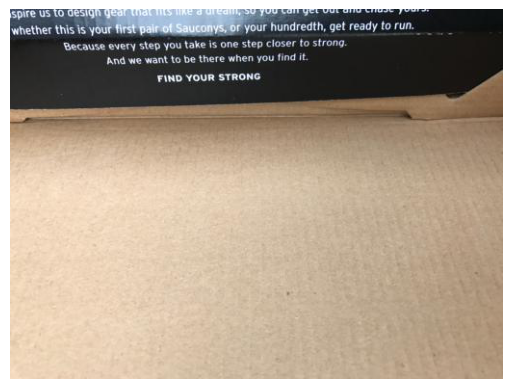


Category: Glass


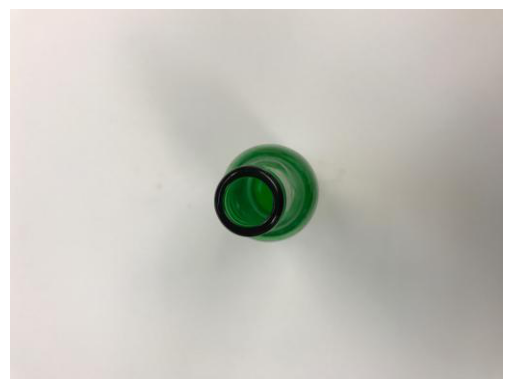


Category: Metal


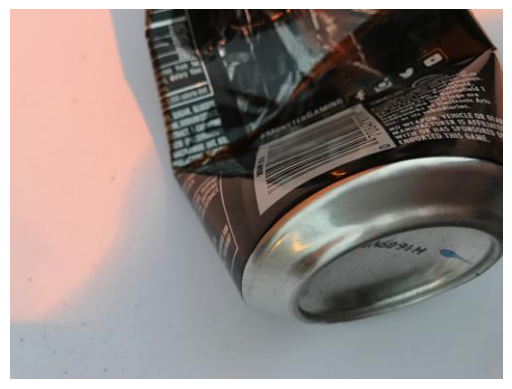


Category: Paper


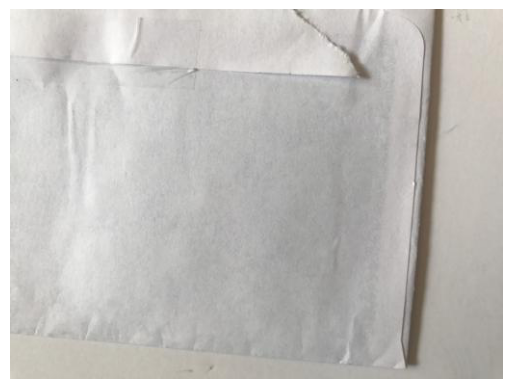


Category: Plastic


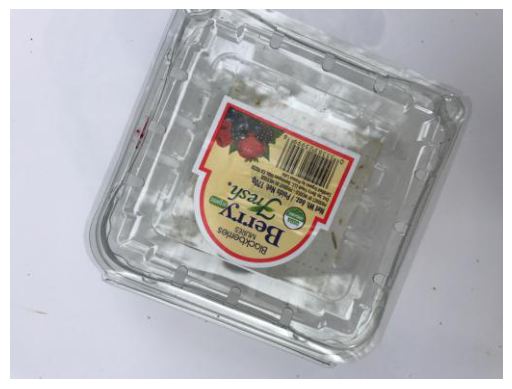


Category: Trash


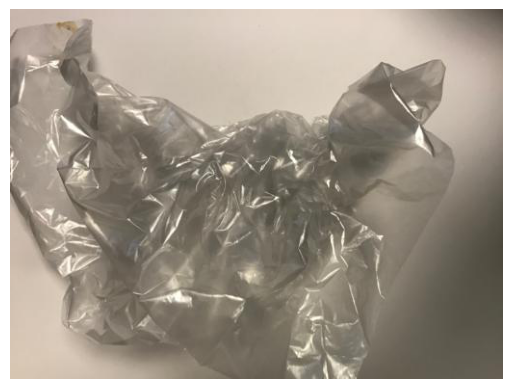

In [ ]:
# function to display images
def show_image(image_path):
    image = Image.open(image_path)
    plt.imshow(image)
    plt.axis('off')
    plt.show()

# display one image from each dataset class
for category, path in dataset_paths.items():
    file_list = os.listdir(path)
    if len(file_list) > 0:
        image_path = os.path.join(path, file_list[0])
        print(f"Category: {category}")
        show_image(image_path)
        print()

## *DATA VISUALIZATION*

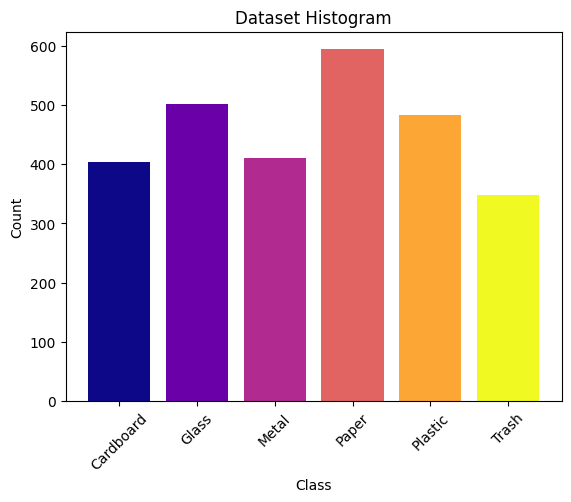

In [ ]:
# graph visualization

# function to count the number of files in each dataset class
def count_files(path):
    return len(os.listdir(path))

# collect information on the number of files in each dataset class
class_counts = []
class_labels = []
for category, path in dataset_paths.items():
    class_counts.append(count_files(path))
    class_labels.append(category)

# create a colormap
cmap = plt.get_cmap('plasma')
colors = [cmap(i) for i in np.linspace(0, 1, len(class_labels))]

# create a histogram
plt.bar(class_labels, class_counts, color=colors)
plt.xlabel('Class')
plt.ylabel('Count')
plt.title('Dataset Histogram')
plt.xticks(rotation=45)
plt.show()

# *PREPROCESSING*

Berikut adalah beberapa preprocessing yang akan digunakan
* 
* 


In [ ]:
# dimensions of the image to be used
img_width, img_height = 128, 128

In [ ]:
dataset_paths = {
    'cardboard': '/tmp/Rubist-Application-main/dataset/cardboard',
    'glass': '/tmp/Rubist-Application-main/dataset/glass',
    'metal': '/tmp/Rubist-Application-main/dataset/metal',
    'paper': '/tmp/Rubist-Application-main/dataset/paper',
    'plastic': '/tmp/Rubist-Application-main/dataset/plastic',
    'trash': '/tmp/Rubist-Application-main/dataset/trash'
}

class_names = ['cardboard', 'glass', 'metal', 'paper', 'plastic', 'trash']
dataset = pd.DataFrame(columns=['image', 'target'])

for class_label, class_name in enumerate(class_names):
    class_path = dataset_paths[class_name]
    image_paths = [os.path.join(class_path, img_name) for img_name in os.listdir(class_path)]
    targets = [class_label] * len(image_paths)
    df = pd.DataFrame({'image': image_paths, 'target': targets})
    dataset = pd.concat([dataset, df], ignore_index=True)

class_counts = dataset['target'].value_counts()

for class_label, count in class_counts.items():
    class_name = class_names[class_label]
    print(f"Class: {class_name}, Count: {count} data")

Class: paper, Count: 594 data
Class: glass, Count: 501 data
Class: plastic, Count: 482 data
Class: metal, Count: 410 data
Class: cardboard, Count: 403 data
Class: trash, Count: 347 data


In [ ]:
from sklearn.preprocessing import LabelEncoder

dataset_paths = {
    'cardboard': '/tmp/Rubist-Application-main/dataset/cardboard',
    'glass': '/tmp/Rubist-Application-main/dataset/glass',
    'metal': '/tmp/Rubist-Application-main/dataset/metal',
    'paper': '/tmp/Rubist-Application-main/dataset/paper',
    'plastic': '/tmp/Rubist-Application-main/dataset/plastic',
    'trash': '/tmp/Rubist-Application-main/dataset/trash'
}

class_names = ['cardboard', 'glass', 'metal', 'paper', 'plastic', 'trash']
dataset = pd.DataFrame(columns=['image', 'target'])

for class_label, class_name in enumerate(class_names):
    class_path = dataset_paths[class_name]
    image_paths = [os.path.join(class_path, img_name) for img_name in os.listdir(class_path)]
    targets = [class_label] * len(image_paths)
    df = pd.DataFrame({'image': image_paths, 'target': targets})
    dataset = pd.concat([dataset, df], ignore_index=True)

# Convert target labels to 0, 1, 2, 3, 4, 5
label_encoder = LabelEncoder()
dataset['target'] = label_encoder.fit_transform(dataset['target'])

class_counts = dataset['target'].value_counts()

for class_label, count in class_counts.items():
    class_name = label_encoder.inverse_transform([class_label])[0]
    print(f"Class: {class_name}, Count: {count} data")

Class: 3, Count: 594 data
Class: 1, Count: 501 data
Class: 4, Count: 482 data
Class: 2, Count: 410 data
Class: 0, Count: 403 data
Class: 5, Count: 347 data


Make dataframe with image as feature and target as target.
(image will be the image's path) and (target will be the image's target)


*   cardboard: 0
*   glass: 1
*   metal: 2
*   paper: 3
*   plastic: 4
*   trash: 5




In [ ]:
print(dataset.head())
print(dataset.tail()) 

                                               image  target
0  /tmp/Rubist-Application-main/dataset/cardboard...       0
1  /tmp/Rubist-Application-main/dataset/cardboard...       0
2  /tmp/Rubist-Application-main/dataset/cardboard...       0
3  /tmp/Rubist-Application-main/dataset/cardboard...       0
4  /tmp/Rubist-Application-main/dataset/cardboard...       0
                                                  image  target
2732  /tmp/Rubist-Application-main/dataset/trash/tra...       5
2733  /tmp/Rubist-Application-main/dataset/trash/org...       5
2734  /tmp/Rubist-Application-main/dataset/trash/org...       5
2735  /tmp/Rubist-Application-main/dataset/trash/org...       5
2736  /tmp/Rubist-Application-main/dataset/trash/tra...       5


## *SPLIT DATA*

In [ ]:
from sklearn.model_selection import train_test_split

# divide the dataset into training sets
train_df, test_df = train_test_split(
    dataset, 
    test_size=0.2, 
    random_state=43, 
    stratify=dataset['target']
)

# divide the test set into validation sets
val_df, test_df = train_test_split(
    test_df, 
    test_size=0.25, 
    random_state=43, 
    stratify=test_df['target']
)

# check if any class has only 1 sample
if any(train_df['target'].value_counts() < 2) or any(val_df['target'].value_counts() < 2) or any(test_df['target'].value_counts() < 2):
    print("Error: Some classes have too few samples")
else:
    # print the shape of the training set
    print("Train: {}".format(train_df.shape))
    for class_label, class_name in enumerate(class_names):
        count = train_df[train_df['target'] == class_label].shape[0]
        print(f"{class_name}  : {count} data")
    
    # print the shape of the validation set
    print("\nVal: {}".format(val_df.shape))
    for class_label, class_name in enumerate(class_names):
        count = val_df[val_df['target'] == class_label].shape[0]
        print(f"{class_name}  : {count} data")
    
    # print the shape of the testing set
    print("\nTest: {}".format(test_df.shape))
    for class_label, class_name in enumerate(class_names):
        count = test_df[test_df['target'] == class_label].shape[0]
        print(f"{class_name}  : {count} data")

Train: (2189, 2)
cardboard  : 322 data
glass  : 401 data
metal  : 328 data
paper  : 475 data
plastic  : 385 data
trash  : 278 data

Val: (411, 2)
cardboard  : 61 data
glass  : 75 data
metal  : 61 data
paper  : 89 data
plastic  : 73 data
trash  : 52 data

Test: (137, 2)
cardboard  : 20 data
glass  : 25 data
metal  : 21 data
paper  : 30 data
plastic  : 24 data
trash  : 17 data


In [ ]:
#  length of the dataset
print("Train length:", len(train_df), type(train_df))
print("Val length:", len(val_df), type(val_df))
print("Test length:", len(test_df), type(test_df))

Train length: 2189 <class 'pandas.core.frame.DataFrame'>
Val length: 411 <class 'pandas.core.frame.DataFrame'>
Test length: 137 <class 'pandas.core.frame.DataFrame'>


In [ ]:
from PIL import Image
import os

# Function to check image count, size, and total size
def check_image_stats(dataset_path):
    image_count = 0
    total_size = 0

    for class_name, class_path in dataset_path.items():
        class_images = os.listdir(class_path)
        image_count += len(class_images)

        for image_name in class_images:
            image_path = os.path.join(class_path, image_name)
            image = Image.open(image_path)
            width, height = image.size
            total_size += width * height

    print("Total Images:", image_count)
    print("Total Size:", total_size, "pixels")

# Call the function with the dataset paths
check_image_stats(dataset_paths)

Total Images: 2737
Total Size: 671315697 pixels


In [ ]:
# function to get image size
def get_image_size(image_path):
    with Image.open(image_path) as img:
        return img.size

# function to check images for each class
def check_images(dataset_df, class_names):
    for class_label, class_name in enumerate(class_names):
        class_images = dataset_df[dataset_df['target'] == class_label]['image'].tolist()
        print(f"Class: {class_name}, Count: {len(class_images)}")
        
        for image_path in class_images[:3]:
            image_size = get_image_size(image_path)
            print(f"Image: {image_path}, Size: {image_size}")
            
        print()

# check images for each class
check_images(train_df, class_names)


Class: cardboard, Count: 322
Image: /tmp/Rubist-Application-main/dataset/cardboard/cardboard382.jpg, Size: (512, 384)
Image: /tmp/Rubist-Application-main/dataset/cardboard/cardboard249.jpg, Size: (512, 384)
Image: /tmp/Rubist-Application-main/dataset/cardboard/cardboard228.jpg, Size: (512, 384)

Class: glass, Count: 401
Image: /tmp/Rubist-Application-main/dataset/glass/glass471.jpg, Size: (512, 384)
Image: /tmp/Rubist-Application-main/dataset/glass/glass199.jpg, Size: (512, 384)
Image: /tmp/Rubist-Application-main/dataset/glass/glass482.jpg, Size: (512, 384)

Class: metal, Count: 328
Image: /tmp/Rubist-Application-main/dataset/metal/metal297.jpg, Size: (512, 384)
Image: /tmp/Rubist-Application-main/dataset/metal/metal193.jpg, Size: (512, 384)
Image: /tmp/Rubist-Application-main/dataset/metal/metal145.jpg, Size: (512, 384)

Class: paper, Count: 475
Image: /tmp/Rubist-Application-main/dataset/paper/paper370.jpg, Size: (512, 384)
Image: /tmp/Rubist-Application-main/dataset/paper/paper94.j

In [ ]:
# function to resize image
def resize_image(image_path, target_size):
    with Image.open(image_path) as img:
        resized_img = img.resize(target_size)
        return resized_img

# check images for all class
def check_images(dataset_df, class_names, target_class):
    class_images = dataset_df[dataset_df['target'] == target_class]['image'].tolist()
    print(f"Class: {class_names[target_class]}, Count: {len(class_images)}")
    
    for image_path in class_images[:3]:
        resized_image = resize_image(image_path, (256, 256))
        print(f"Image: {image_path}, Resized Size: {resized_image.size}")
        
    print()

# check "trash" class
check_images(train_df, class_names, 5)

Class: trash, Count: 278
Image: /tmp/Rubist-Application-main/dataset/trash/trash99.jpg, Resized Size: (256, 256)
Image: /tmp/Rubist-Application-main/dataset/trash/org (88).jpg, Resized Size: (256, 256)
Image: /tmp/Rubist-Application-main/dataset/trash/org (114).jpg, Resized Size: (256, 256)



In [ ]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2189 entries, 1948 to 1381
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   image   2189 non-null   object
 1   target  2189 non-null   int64 
dtypes: int64(1), object(1)
memory usage: 51.3+ KB


In [ ]:
train_df.head()

image  target
1948  /tmp/Rubist-Application-main/dataset/plastic/p...       4
1661  /tmp/Rubist-Application-main/dataset/paper/pap...       3
2085  /tmp/Rubist-Application-main/dataset/plastic/p...       4
1290  /tmp/Rubist-Application-main/dataset/metal/met...       2
1777  /tmp/Rubist-Application-main/dataset/paper/pap...       3

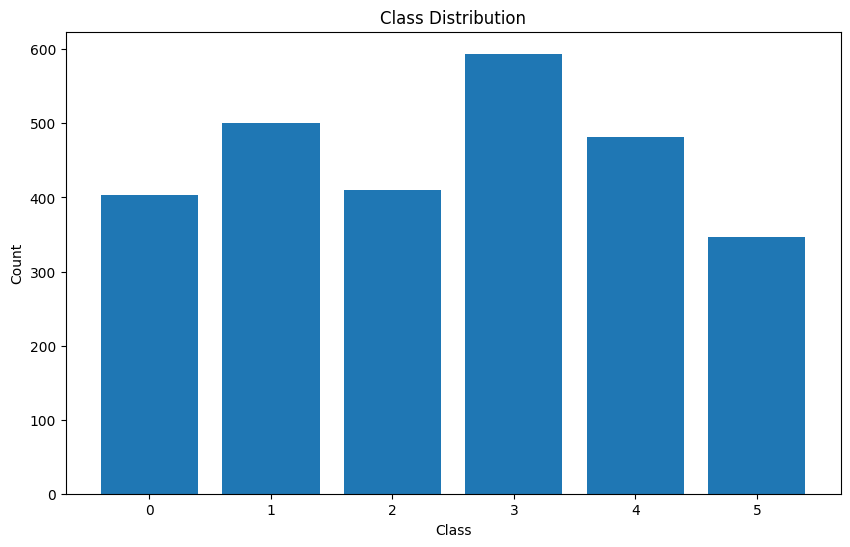

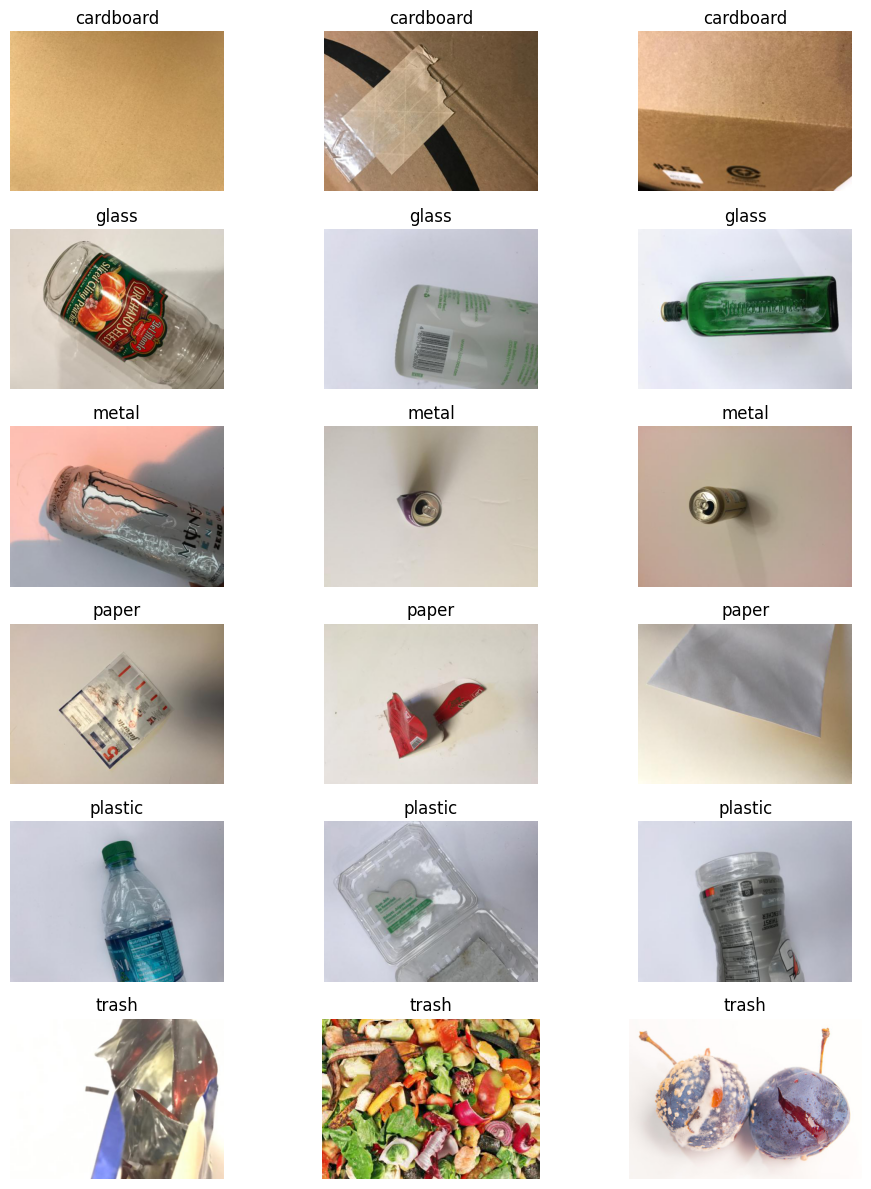

In [ ]:
# bar chart
class_counts = dataset['target'].value_counts()
class_labels = [label_encoder.inverse_transform([class_label])[0] for class_label in class_counts.index]

plt.figure(figsize=(10, 6))
plt.bar(class_labels, class_counts)
plt.xlabel('Class')
plt.ylabel('Count')
plt.title('Class Distribution')
plt.show()

# sample images from each class
num_samples = 3

fig, axes = plt.subplots(len(class_names), num_samples, figsize=(10, 12))

for i, class_name in enumerate(class_names):
    class_images = dataset[dataset['target'] == i]['image'].sample(num_samples)
    for j, image_path in enumerate(class_images):
        image = Image.open(image_path)
        axes[i][j].imshow(image)
        axes[i][j].set_title(class_name)
        axes[i][j].axis('off')

plt.tight_layout()
plt.show()

## *NORMALIZING*

proses mengubah skala data menjadi rentang yang seragam, umumnya dari 0 hingga 1. Tujuan dari normalisasi data adalah untuk menghilangkan perbedaan skala yang mungkin ada antara fitur-fitur yang ada dalam dataset. 

In [ ]:
import tensorflow as tf

dim = 150

def decode_image(filename, label=None, image_size=(dim, dim)):
    bits = tf.io.read_file(filename)
    image = tf.image.decode_jpeg(bits, channels=3)
    image = tf.cast(image, tf.float32)  # Convert to float32
    image /= 255.0  # Normalize
    image = tf.image.resize(image, image_size)  # Resize

    if label is None:
        return image
    else:
        return image, tf.one_hot(label, depth=len(category))

## EVALUASI DATA

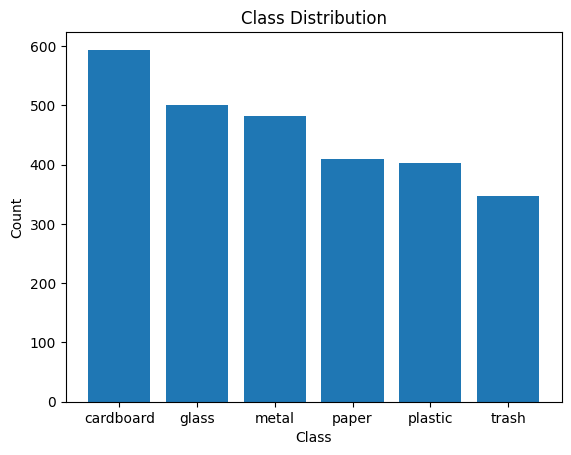

In [ ]:
class_counts = dataset['target'].value_counts()
class_names = ['cardboard', 'glass', 'metal', 'paper', 'plastic', 'trash']

plt.bar(class_names, class_counts)
plt.xlabel('Class')
plt.ylabel('Count')
plt.title('Class Distribution')
plt.show()

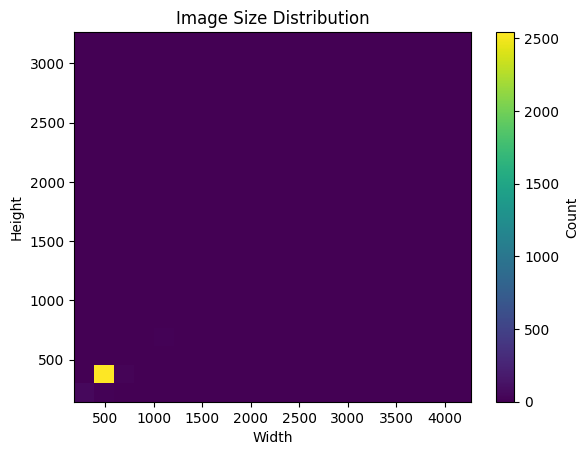

In [ ]:
image_sizes = [Image.open(row['image']).size for _, row in dataset.iterrows()]
widths = [size[0] for size in image_sizes]
heights = [size[1] for size in image_sizes]

plt.hist2d(widths, heights, bins=20)
plt.xlabel('Width')
plt.ylabel('Height')
plt.title('Image Size Distribution')
plt.colorbar(label='Count')
plt.show()

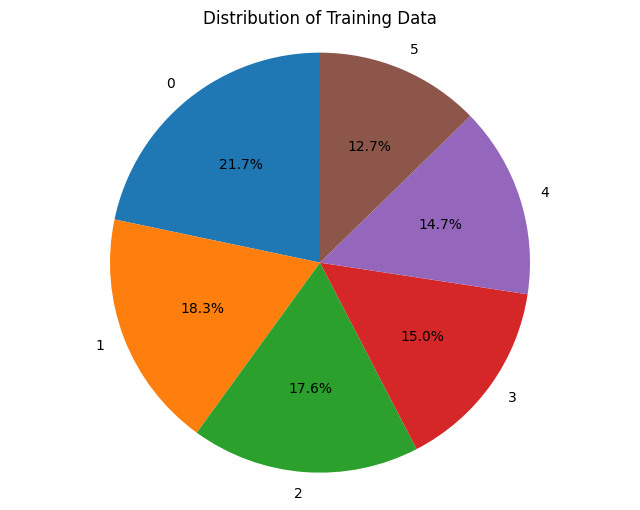

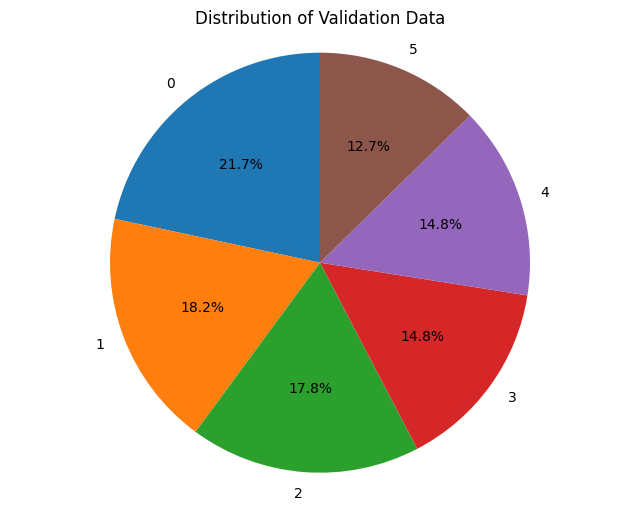

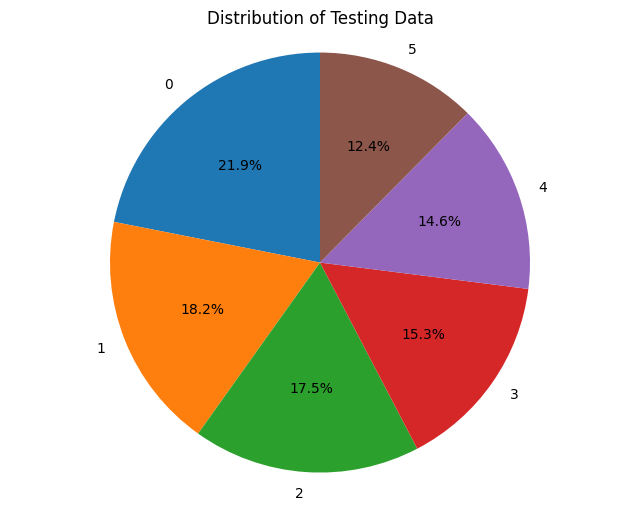

In [ ]:
train_counts = train_df['target'].value_counts()
val_counts = val_df['target'].value_counts()
test_counts = test_df['target'].value_counts()


class_names = label_encoder.classes_

# pie chart
plt.figure(figsize=(8, 6))
plt.pie(train_counts, labels=class_names, autopct='%1.1f%%', startangle=90)
plt.axis('equal') 
plt.title('Distribution of Training Data')
plt.show()

plt.figure(figsize=(8, 6))
plt.pie(val_counts, labels=class_names, autopct='%1.1f%%', startangle=90)
plt.axis('equal')  
plt.title('Distribution of Validation Data')
plt.show()

plt.figure(figsize=(8, 6))
plt.pie(test_counts, labels=class_names, autopct='%1.1f%%', startangle=90)
plt.axis('equal')  
plt.title('Distribution of Testing Data')
plt.show()


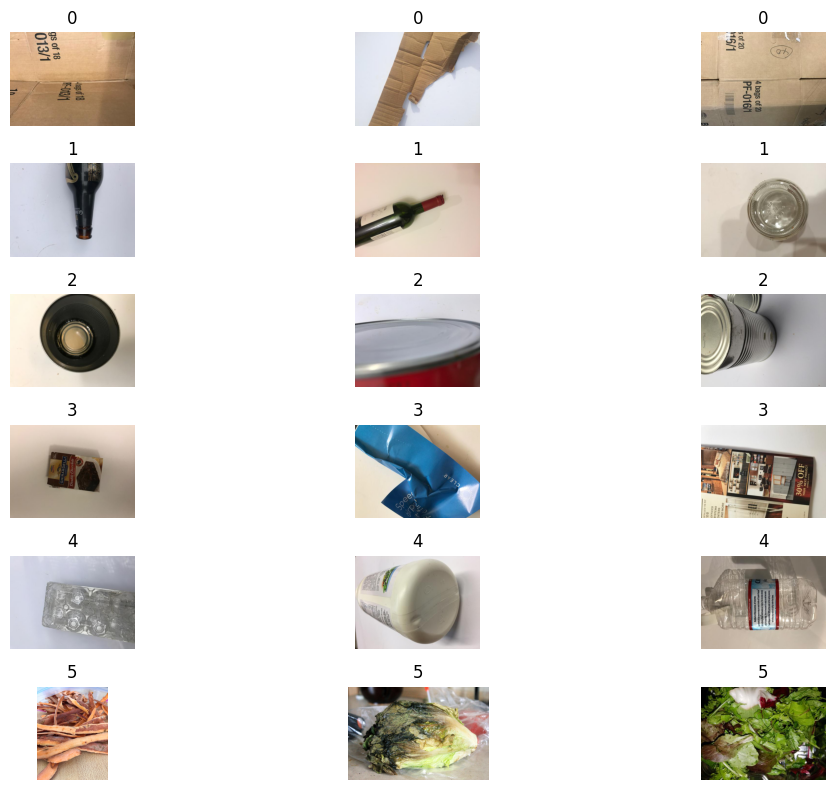

In [ ]:
num_examples = 3  # Number of example images to show per class

plt.figure(figsize=(12, 8))

for i, class_name in enumerate(class_names):
    class_samples = dataset[dataset['target'] == i].sample(num_examples)
    for j, (_, row) in enumerate(class_samples.iterrows()):
        image = Image.open(row['image'])
        plt.subplot(len(class_names), num_examples, i * num_examples + j + 1)
        plt.imshow(image)
        plt.title(class_name)
        plt.axis('off')

plt.tight_layout()
plt.show()

# *MODELING*

# *DATA AUGMENTATION*

 Teknik dalam pengolahan data yang melibatkan pembuatan variasi baru dari data latih yang ada dengan menerapkan transformasi dan manipulasi pada gambar atau data lainnya. Tujuannya adalah untuk meningkatkan keragaman dan jumlah data latih yang tersedia, sehingga dapat membantu meningkatkan performa model.

In [ ]:
def augment_image(image):
    # Lakukan augmentasi sesuai kebutuhan, contoh:
    image = tf.image.random_flip_left_right(image)
    image = tf.image.random_flip_up_down(image)
    image = tf.image.random_brightness(image, max_delta=0.2)
    image = tf.image.random_contrast(image, lower=0.5, upper=1.5)
    # Tambahkan teknik augmentasi lainnya sesuai kebutuhan

    return image

# Fungsi untuk membaca dan augmentasi gambar
def load_and_augment_image(filename, label):
    image = tf.io.read_file(filename)
    image = tf.image.decode_jpeg(image, channels=3)
    image = tf.image.convert_image_dtype(image, tf.float32)  # Konversi ke float32
    image = augment_image(image)  # Augmentasi gambar
    return image, label

In [ ]:
def decode_image(filename, label=None, image_size=(512, 384)):
    bits = tf.io.read_file(filename)
    image = tf.image.decode_jpeg(bits, channels=3)
    image = tf.image.resize(image, image_size)  # Resize
    image = tf.cast(image, tf.float32)  # Convert to float32
    image /= 255.0  # Normalize
    
    if label is not None:
        label = tf.one_hot(label, depth=len(category))
        return image, label
    else:
        return image

Training Set:
Label:  tf.Tensor(4, shape=(), dtype=int64)


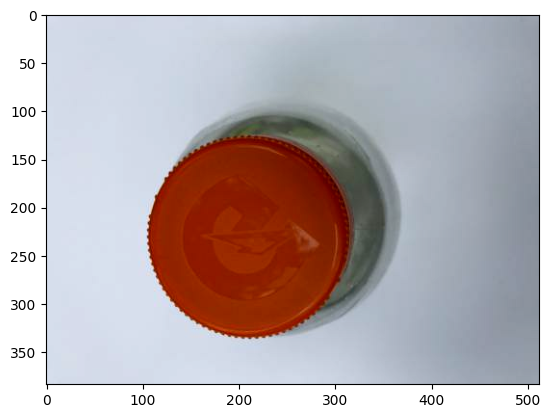

Label:  tf.Tensor(3, shape=(), dtype=int64)


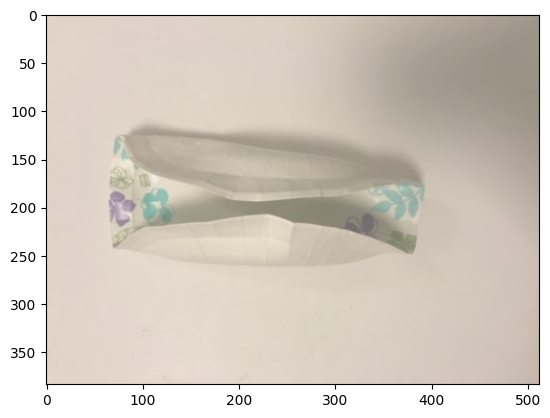

Label:  tf.Tensor(4, shape=(), dtype=int64)


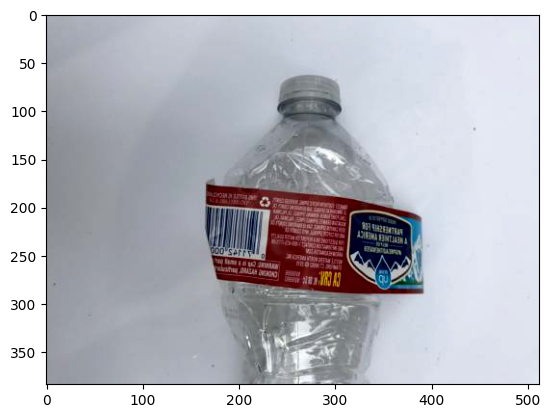

Validation Set:
Label:  tf.Tensor(5, shape=(), dtype=int64)


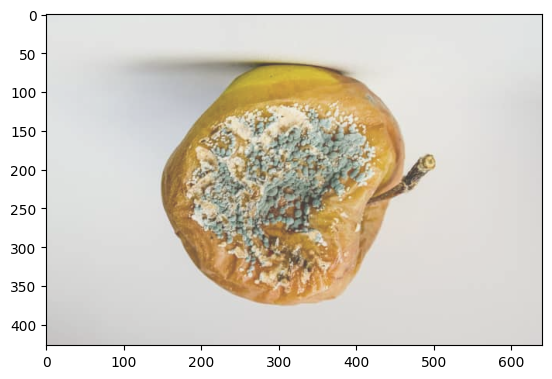

Label:  tf.Tensor(3, shape=(), dtype=int64)


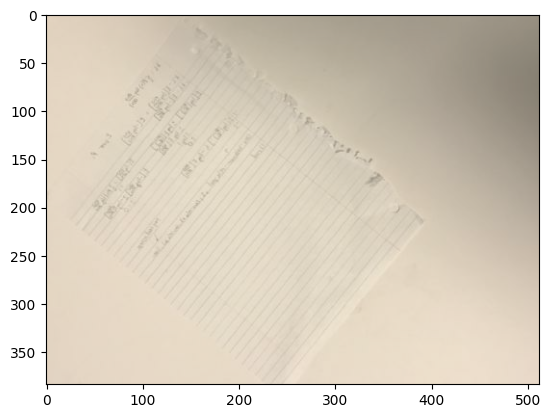

Label:  tf.Tensor(1, shape=(), dtype=int64)


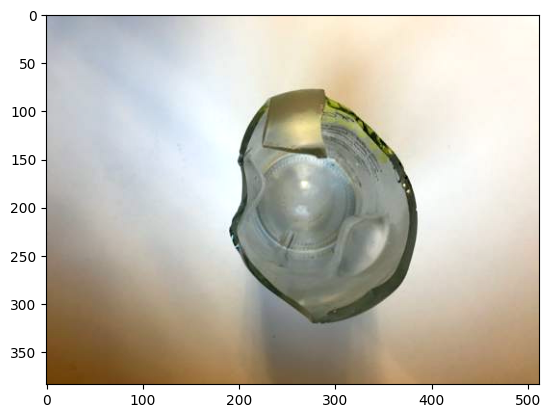

Testing Set:


Label:  tf.Tensor(4, shape=(), dtype=int64)


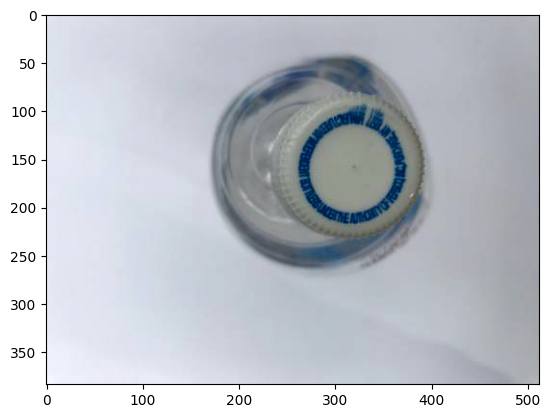

Label:  tf.Tensor(1, shape=(), dtype=int64)


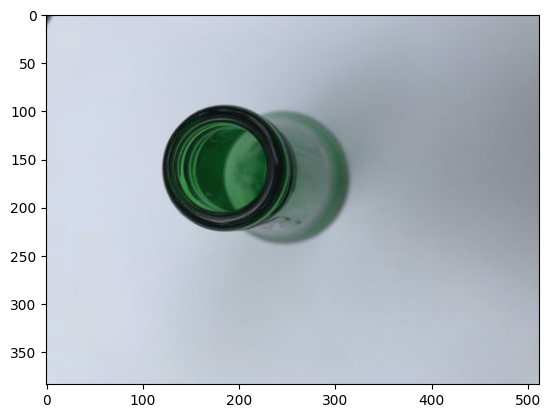

Label:  tf.Tensor(0, shape=(), dtype=int64)


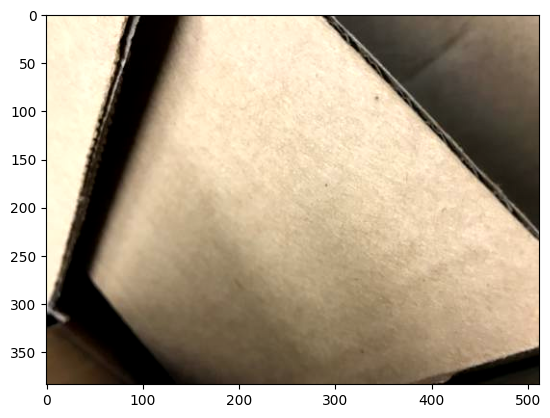

In [ ]:
# Buat dataset untuk training set
train_dataset = tf.data.Dataset.from_tensor_slices((train_df['image'], train_df['target']))
train_dataset = train_dataset.map(load_and_augment_image)
#train_dataset = train_dataset.map(lambda x, y: (decode_image(x), y))

# Buat dataset untuk validation set
val_dataset = tf.data.Dataset.from_tensor_slices((val_df['image'], val_df['target']))
val_dataset = val_dataset.map(load_and_augment_image)
#val_dataset = val_dataset.map(lambda x, y: (decode_image(x), y))

# Buat dataset untuk testing set
test_dataset = tf.data.Dataset.from_tensor_slices((test_df['image'], test_df['target']))
test_dataset = test_dataset.map(load_and_augment_image)
#test_dataset = test_dataset.map(lambda x, y: (decode_image(x), y))



# Contoh iterasi melalui dataset augmented untuk training set
print("Training Set:")
for image, label in train_dataset.take(3):  # Ambil 3 contoh dari dataset training
    # Tampilkan gambar dan labelnya
    print("Label: ", label)
    plt.imshow(image.numpy())
    plt.show()

# Contoh iterasi melalui dataset augmented untuk validation set
print("Validation Set:")
for image, label in val_dataset.take(3):  # Ambil 3 contoh dari dataset validation
    # Tampilkan gambar dan labelnya
    print("Label: ", label)
    plt.imshow(image.numpy())
    plt.show()

# Contoh iterasi melalui dataset augmented untuk testing set
print("Testing Set:")
for image, label in test_dataset.take(3):  # Ambil 3 contoh dari dataset testing
    # Tampilkan gambar dan labelnya
    print("Label: ", label)
    plt.imshow(image.numpy())
    plt.show()

In [ ]:
train_df['image'] = train_df['image'].astype(str)
val_df['image'] = val_df['image'].astype(str)
test_df['image'] = test_df['image'].astype(str)

# *TRANSFER LEARNING*

Teknik yang melibatkan penggunaan pengetahuan yang sudah ada dari model yang sudah dilatih sebelumnya untuk menyelesaikan tugas baru yang serupa. Kita menggunakan model yang telah dilatih pada *dataset* yang besar sebagai titik awal, dan kemudian menyesuaikannya atau menggunakannya sebagai fitur ekstraktor untuk tugas spesifik yang lebih kecil atau *dataset* yang terbatas.

In [ ]:
import tensorflow_hub as hub

# Definisikan parameter transfer learning
module_selection = ("mobilenet_v2", 224, 1280) #@param ["(\"mobilenet_v2\", 224, 1280)", "(\"inception_v3\", 299, 2048)"] {type:"raw", allow-input: true}
handle_base, pixels, FV_SIZE = module_selection
MODULE_HANDLE = "https://tfhub.dev/google/imagenet/resnet_v2_50/feature_vector/5"  # Model yang akan digunakan
IMAGE_SIZE = (pixels, pixels)  # Ukuran gambar input
#FV_SIZE = 2048  # Ukuran fitur dari model transfer learning


do_fine_tuning = True  # Apakah akan dilakukan fine-tuning pada model transfer learning

# Terapkan transfer learning
feature_extractor = hub.KerasLayer(MODULE_HANDLE,
                                   input_shape=IMAGE_SIZE + (3,), 
                                   output_shape=[FV_SIZE],
                                   trainable=do_fine_tuning)

In [ ]:
# Data augmentation
train_datagen = ImageDataGenerator(
    rescale=1./255,
    shear_range=0.2,
    zoom_range=0.2,
    width_shift_range=0.2,
    height_shift_range=0.2,
    horizontal_flip=True,
    rotation_range=40,
    fill_mode='nearest'
)

test_datagen = ImageDataGenerator(
    rescale=1./255,
    validation_split=0.1
)

# Menggunakan direktori gambar untuk generator
base_path = '/tmp/Rubist-Application-main/dataset'

train_generator = train_datagen.flow_from_directory(
    base_path,
    target_size=IMAGE_SIZE,
    batch_size=25,
    class_mode='categorical',
    subset='training',
    seed=0
)

validation_generator = test_datagen.flow_from_directory(
    base_path,
    target_size=IMAGE_SIZE,
    batch_size=25,
    class_mode='categorical',
    subset='validation',
    seed=0
)

# Print label dan jumlah kategori
labels = train_generator.class_indices
print(labels)
print(len(labels))

Found 2737 images belonging to 6 classes.
Found 272 images belonging to 6 classes.
{'cardboard': 0, 'glass': 1, 'metal': 2, 'paper': 3, 'plastic': 4, 'trash': 5}
6


In [ ]:
model = tf.keras.Sequential([
    feature_extractor,
    tf.keras.layers.Dense(256, activation='relu', kernel_regularizer=tf.keras.regularizers.l2(0.001)),
    tf.keras.layers.Dropout(0.4),
    tf.keras.layers.Dense(len(labels), activation='softmax')
])

In [ ]:
model.summary()

Model: "sequential_5"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 keras_layer_4 (KerasLayer)  (None, 2048)              23564800  
                                                                 
 dense_10 (Dense)            (None, 256)               524544    
                                                                 
 dropout_5 (Dropout)         (None, 256)               0         
                                                                 
 dense_11 (Dense)            (None, 6)                 1542      
                                                                 
Total params: 24,090,886
Trainable params: 24,045,446
Non-trainable params: 45,440
_________________________________________________________________


In [ ]:
if do_fine_tuning:
    optimizer = tf.keras.optimizers.SGD(learning_rate=0.002, momentum=0.9)
    feature_extractor.trainable = True
else: 
    feature_extractor.trainable = False
    optimizer = "adam"

In [ ]:
# Compile model
model.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['accuracy'])

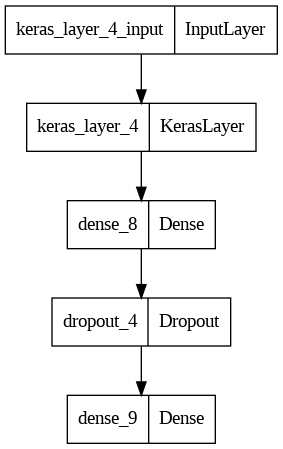

In [ ]:
plot_model(model)

In [ ]:
# Set the number of epochs
num_epochs = 10

# Train the model
history = model.fit(
    train_generator,
    epochs=num_epochs,
    validation_data=validation_generator
)

Epoch 1/10
110/110 [==============================] - 1991s 18s/step - loss: 2.1254 - accuracy: 0.4366 - val_loss: 5.4619 - val_accuracy: 0.2426
Epoch 2/10
110/110 [==============================] - 2051s 19s/step - loss: 1.8088 - accuracy: 0.5444 - val_loss: 2.5395 - val_accuracy: 0.3750
Epoch 3/10
110/110 [==============================] - 2012s 18s/step - loss: 1.6088 - accuracy: 0.5780 - val_loss: 7.7018 - val_accuracy: 0.3824
Epoch 4/10
110/110 [==============================] - 2010s 18s/step - loss: 1.4767 - accuracy: 0.6343 - val_loss: 2.1833 - val_accuracy: 0.5331
Epoch 5/10
110/110 [==============================] - 2016s 18s/step - loss: 1.3423 - accuracy: 0.6635 - val_loss: 6.8212 - val_accuracy: 0.3015
Epoch 6/10
110/110 [==============================] - 1988s 18s/step - loss: 1.2866 - accuracy: 0.6832 - val_loss: 2.8751 - val_accuracy: 0.3824
Epoch 7/10
110/110 [==============================] - 2020s 18s/step - loss: 1.1959 - accuracy: 0.7132 - val_loss: 1.5071 - val_ac

# *DROPOUT*


*Dropout* secara acak menonaktifkan sebagian neuron dalam jaringan selama pelatihan. Fungsinya untuk mengurangi *overfitting* dalam model. *Dropout* membantu mengurangi overfitting dengan memaksa jaringan neural untuk tidak terlalu bergantung pada hubungan spesifik antara unit-unit yang ada.

# *FINE TUNING*

Teknik dalam *transfer learning* yang melibatkan pengambilan model *pre-trained*. Tujuannya untuk mengoptimalkan kinerja model pada *dataset* baru dengan memanfaatkan pengetahuan yang sudah ada dari model *pre-trained*.

# *PERFORMANCE EVALUATION*

## *VALIDATION ACCURACY*

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])


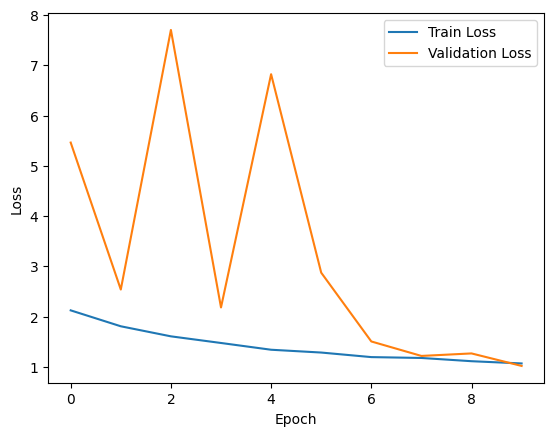

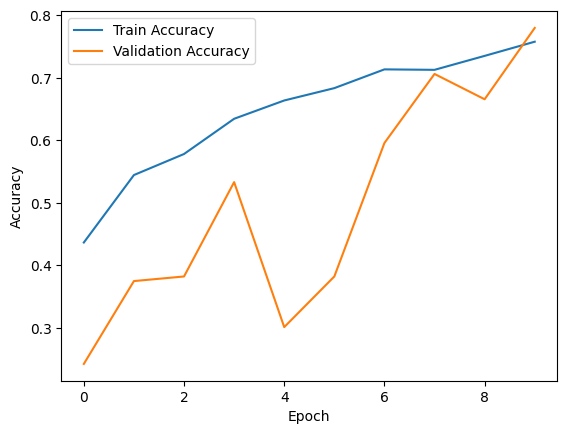

In [ ]:
# Mencetak riwayat pelatihan
print(history.history.keys())

# Menampilkan grafik loss dan akurasi
import matplotlib.pyplot as plt

# Plot Loss
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.show()

# Plot Accuracy
plt.plot(history.history['accuracy'], label='Train Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

In [ ]:
score = model.evaluate(train_generator, return_dict=True, verbose=0)

print(score)

{'loss': 1.0735554695129395, 'accuracy': 0.75228351354599}


In [ ]:
model.save('model_1.h5')

In [ ]:
try:
    files.download('model_1.h5')
except:
    pass

In [ ]:
# Nama file untuk menyimpan model
model_filename = 'model_1.h5'

# Simpan model ke format .h5
model.save(model_filename)

# Fungsi untuk mengunduh file
def download_file(file_path):
    from google.colab import files
    files.download(file_path)

# Unduh model ke perangkat
download_file(model_filename)


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>